In [1]:
# import the scientific calculating tools
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt


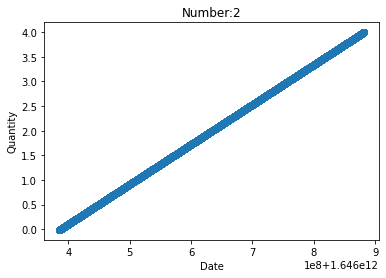

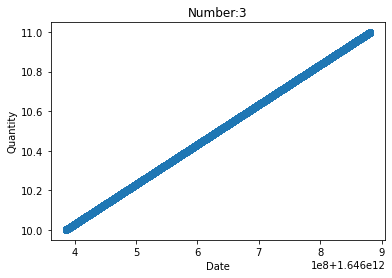

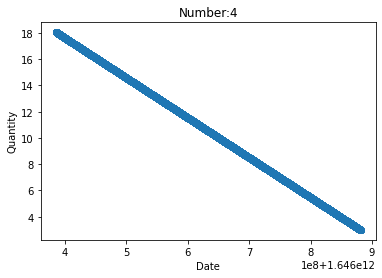

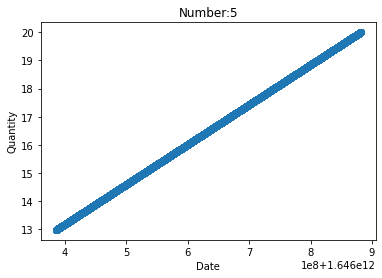

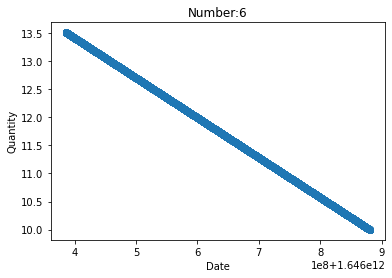

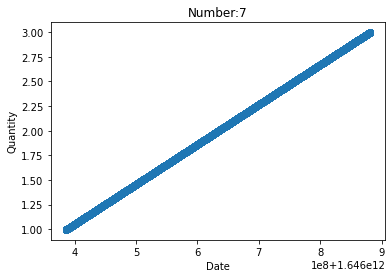

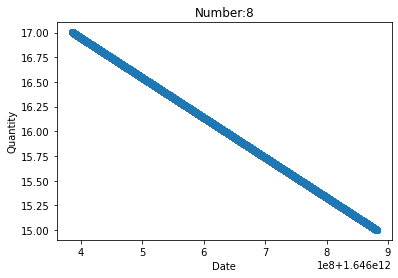

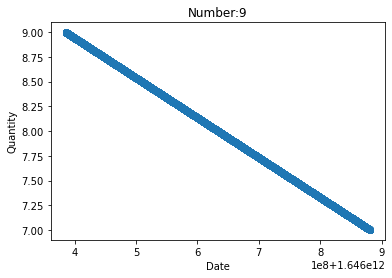

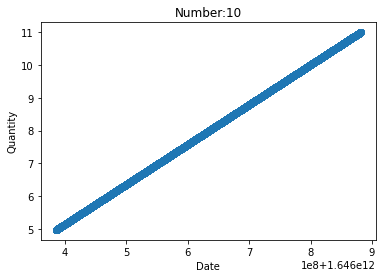

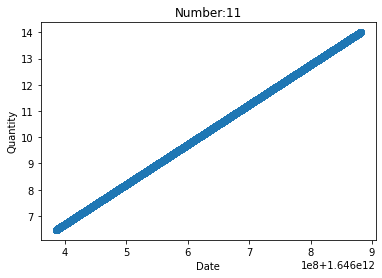

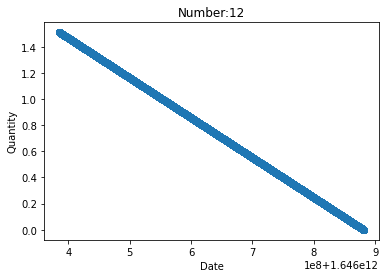

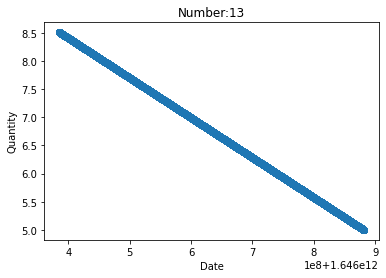

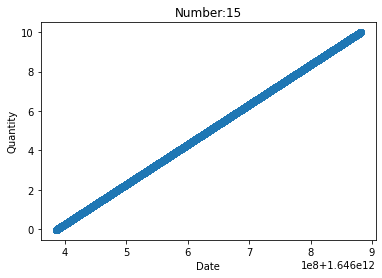

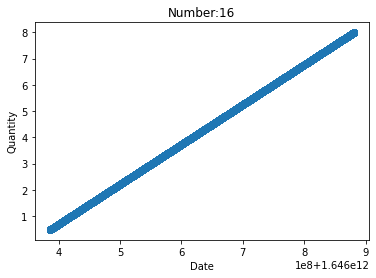

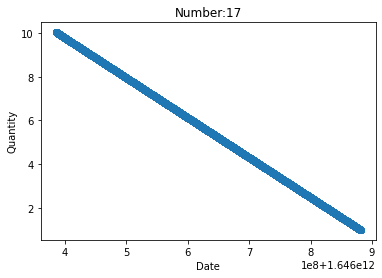

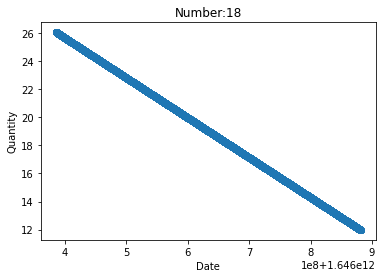

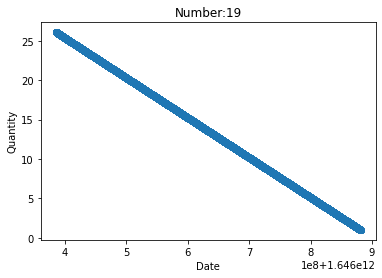

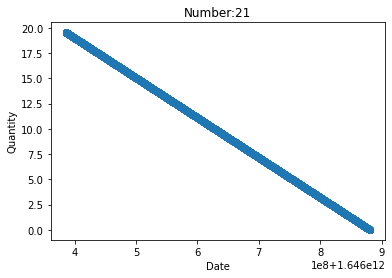

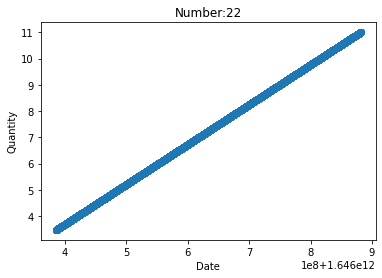

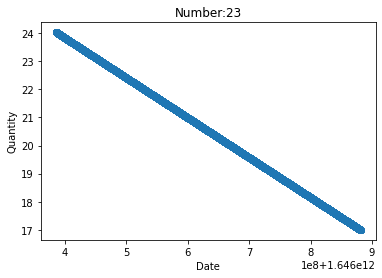

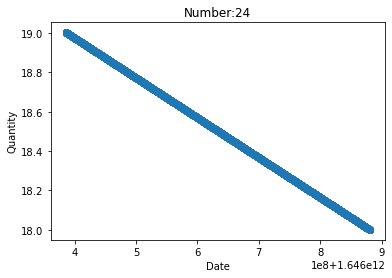

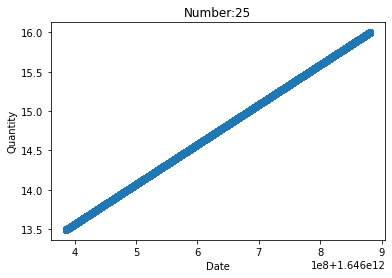

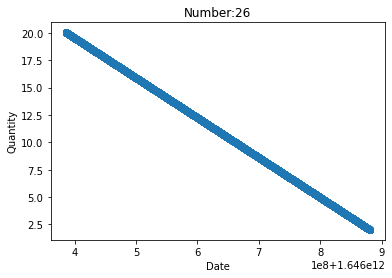

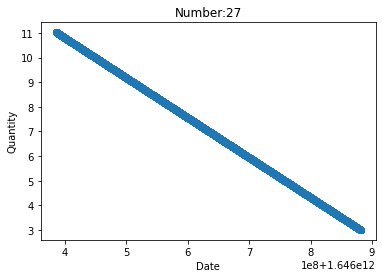

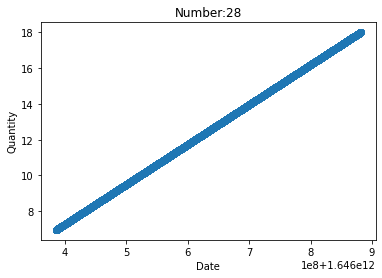

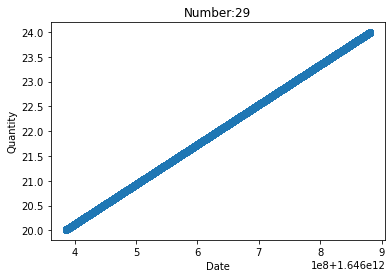

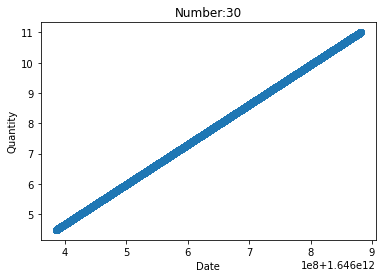

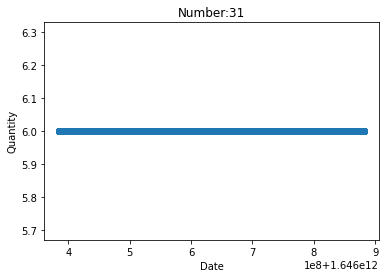

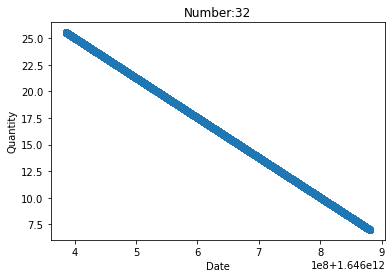

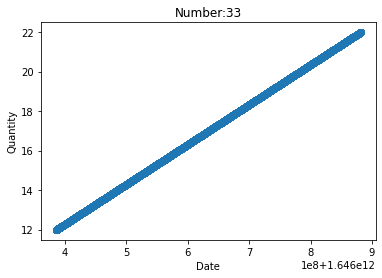

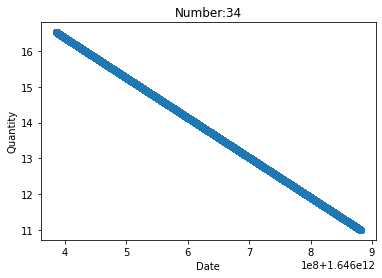

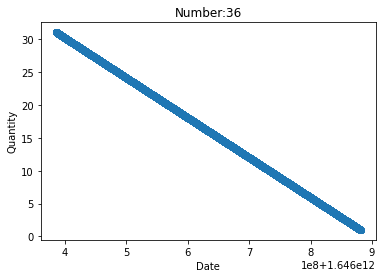

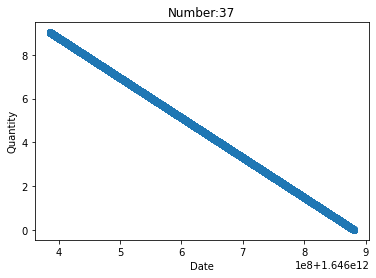

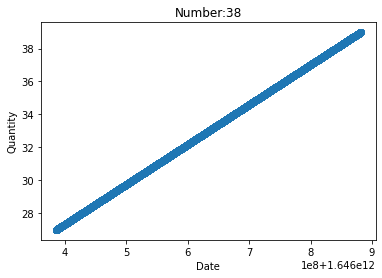

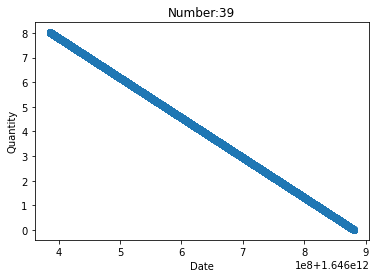

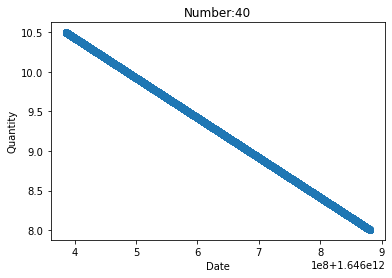

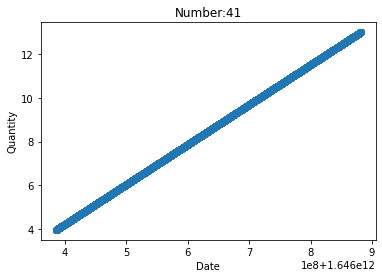

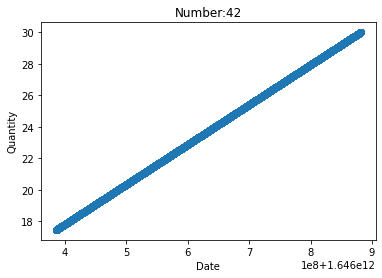

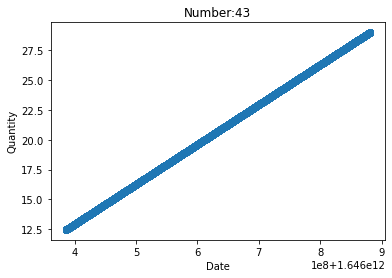

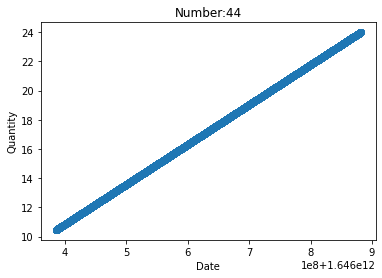

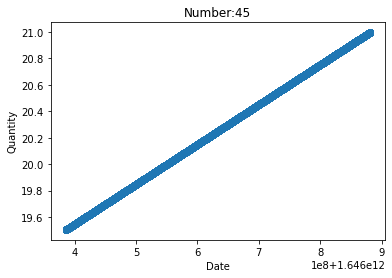

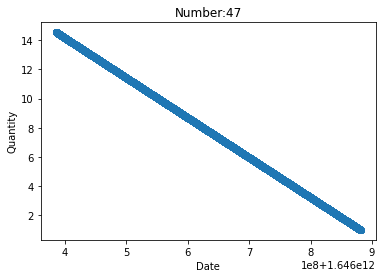

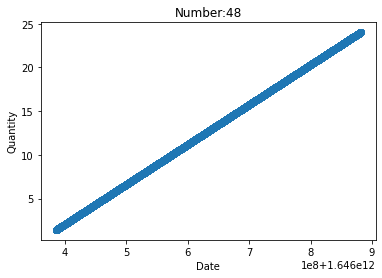

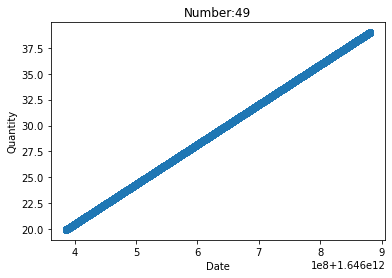

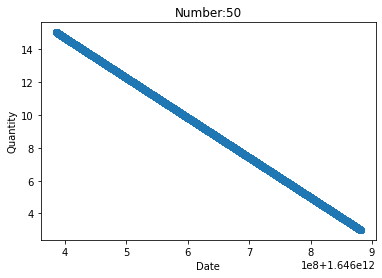

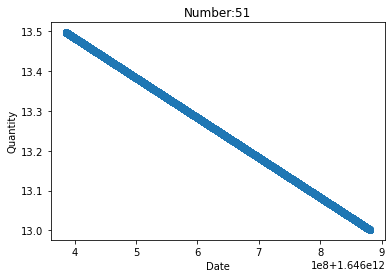

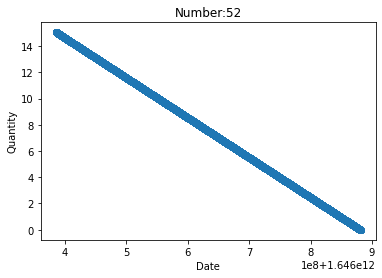

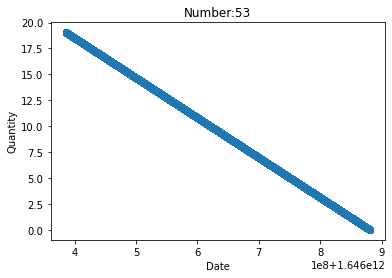

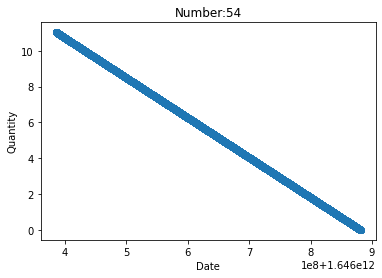

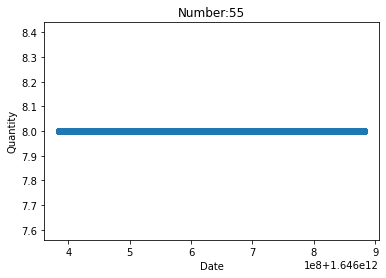

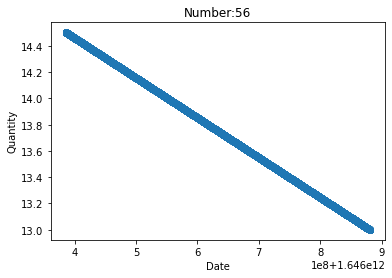

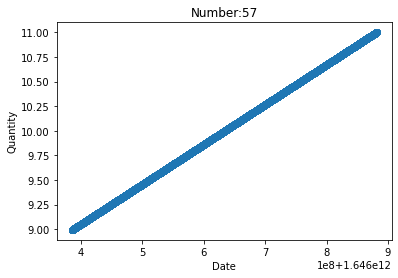

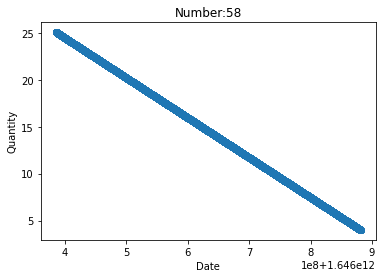

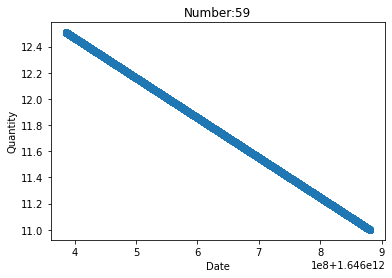

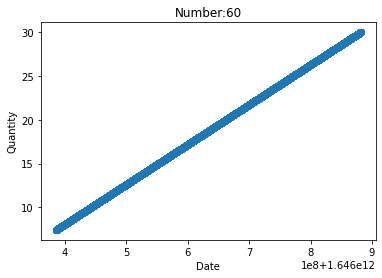

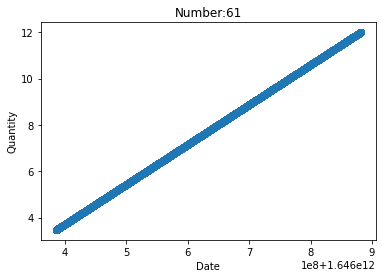

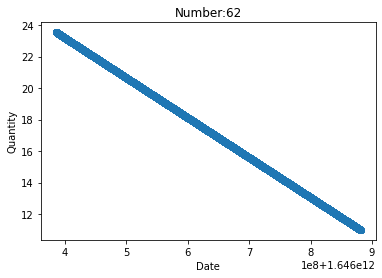

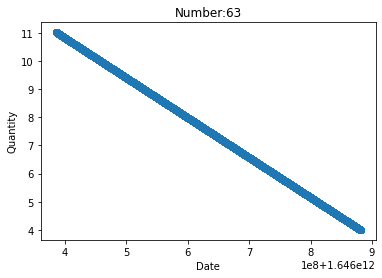

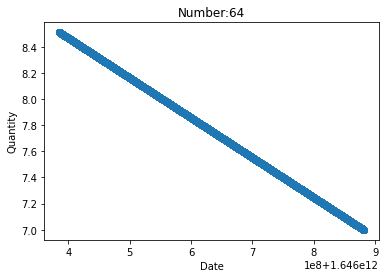

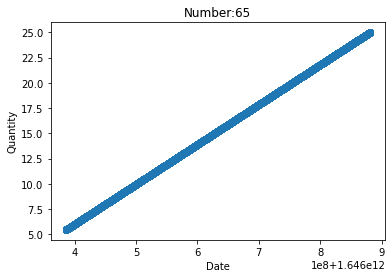

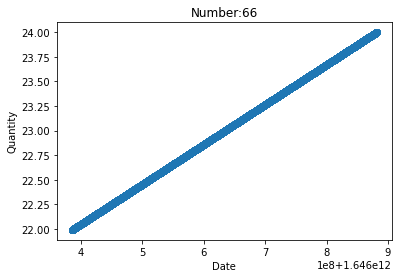

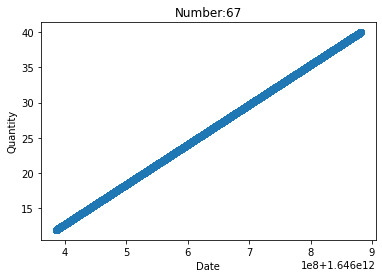

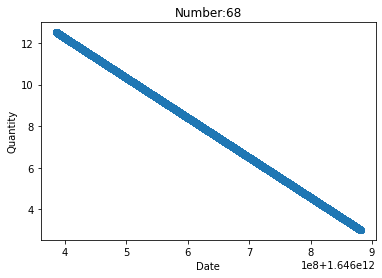

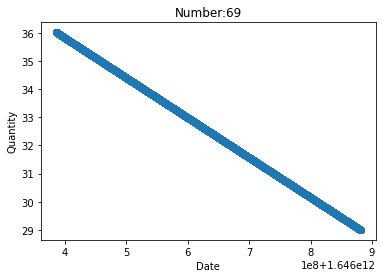

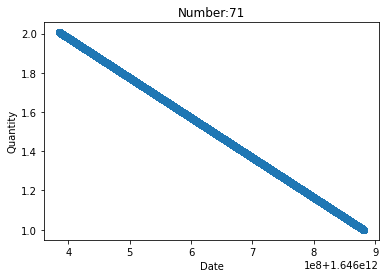

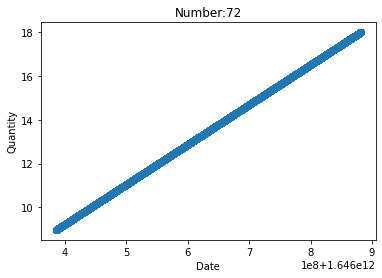

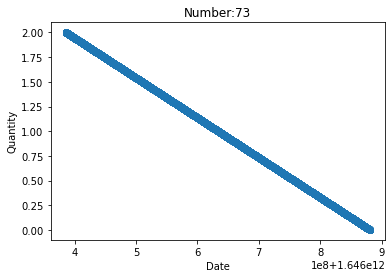

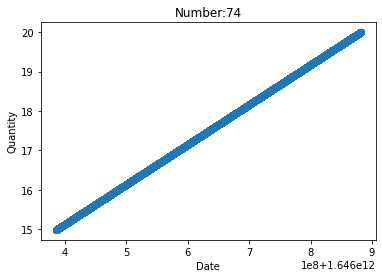

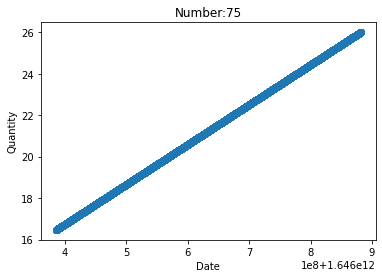

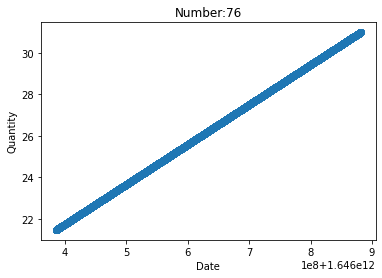

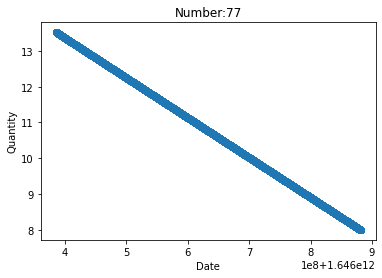

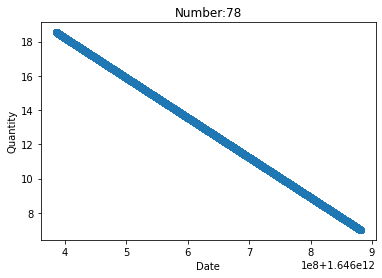

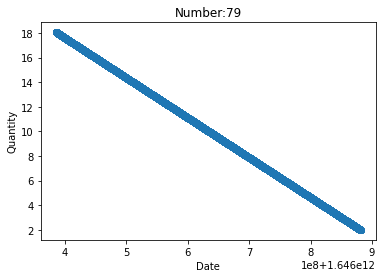

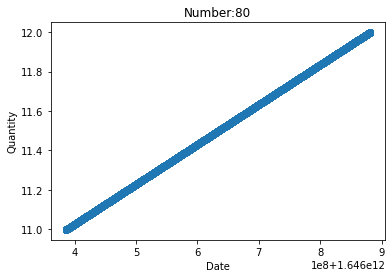

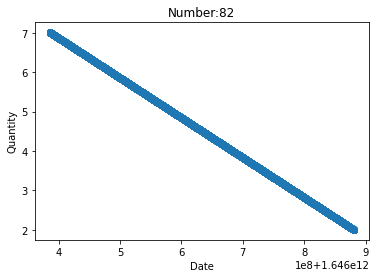

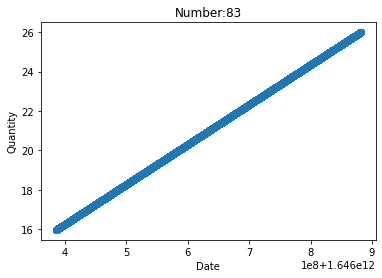

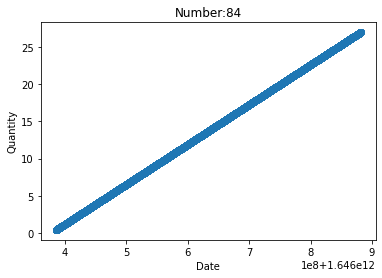

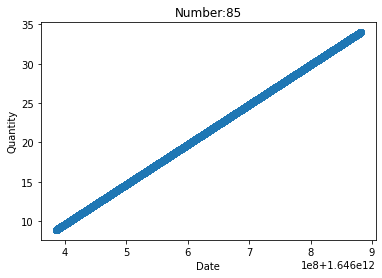

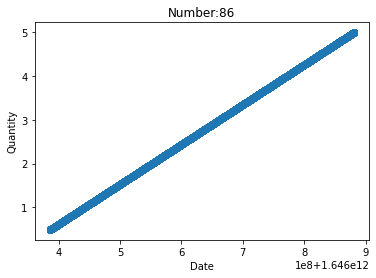

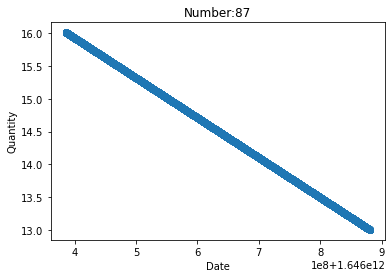

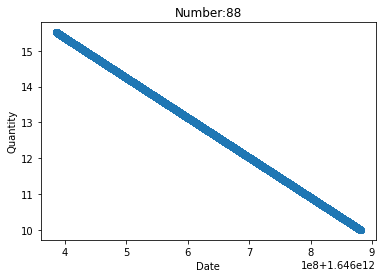

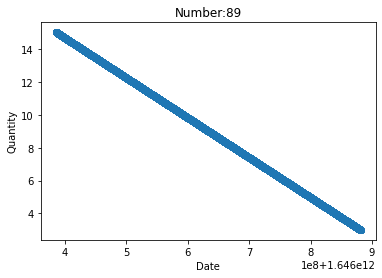

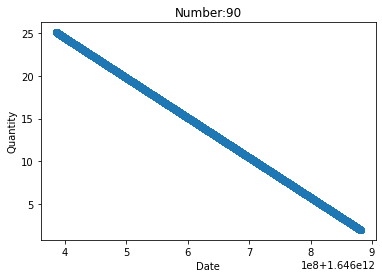

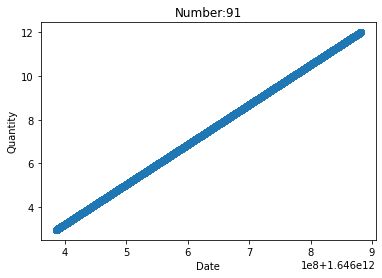

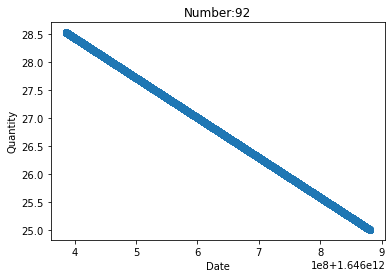

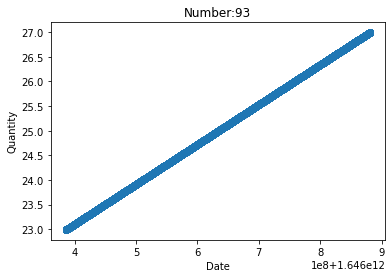

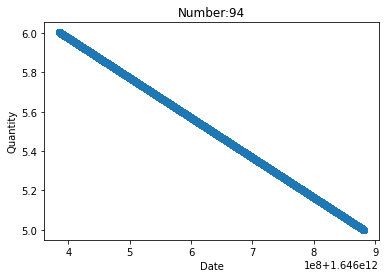

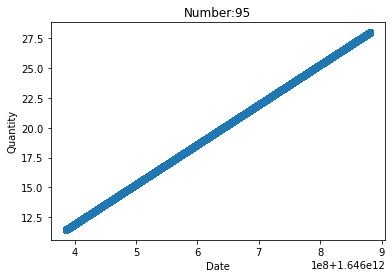

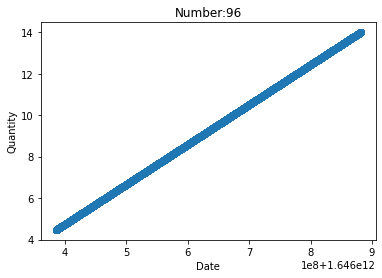

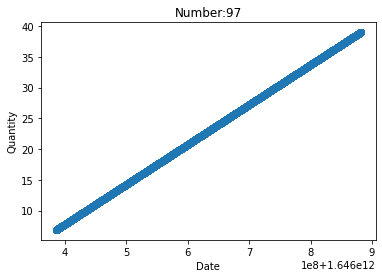

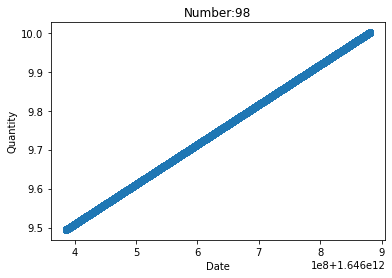

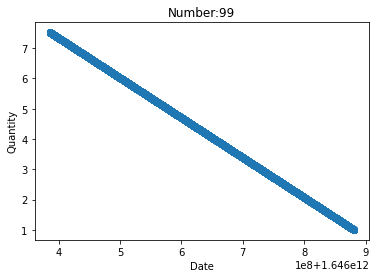

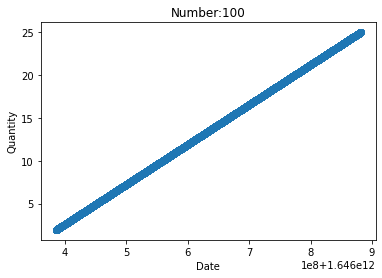

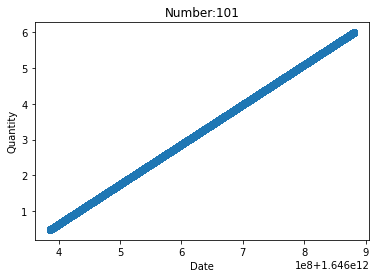

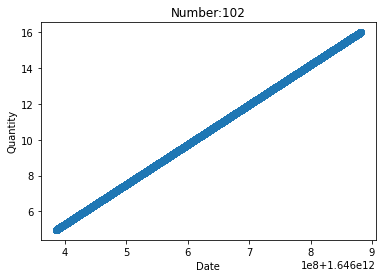

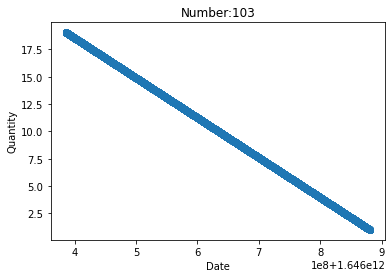

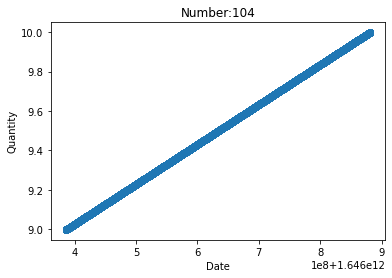

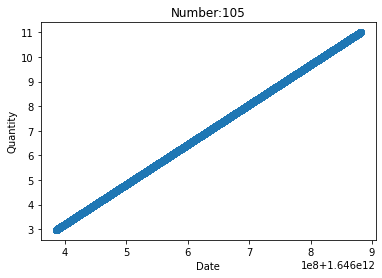

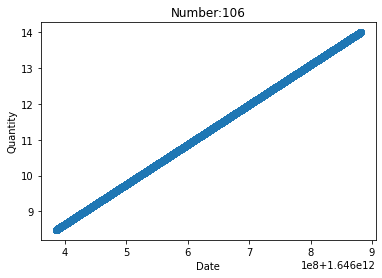

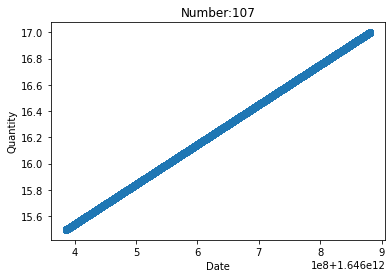

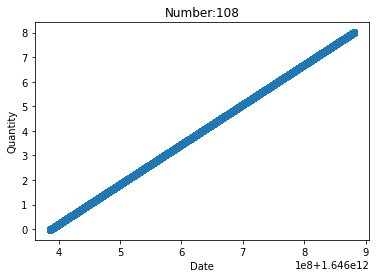

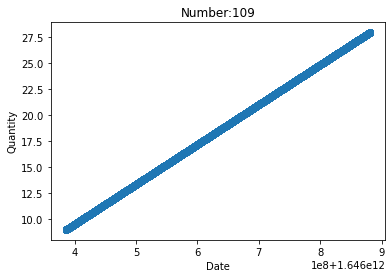

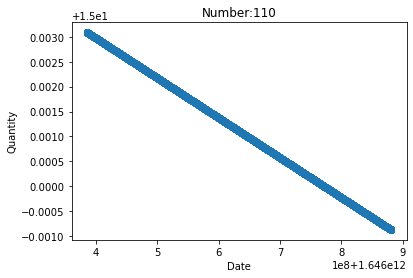

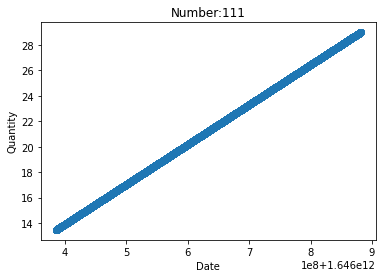

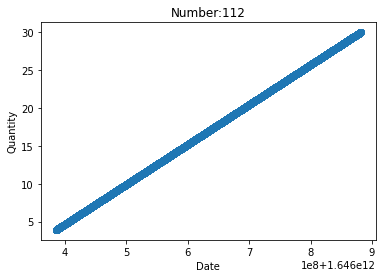

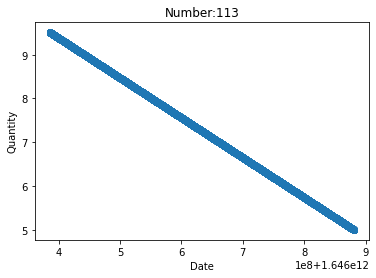

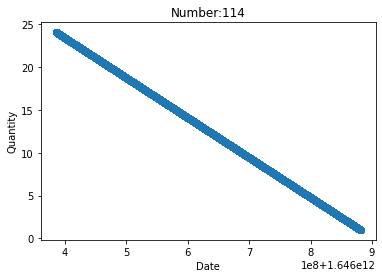

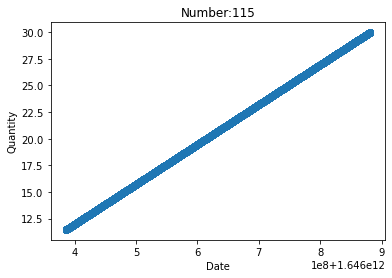

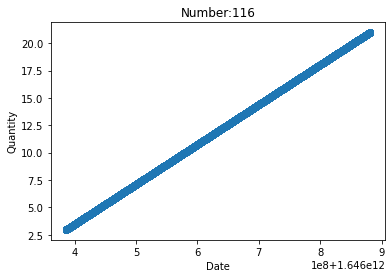

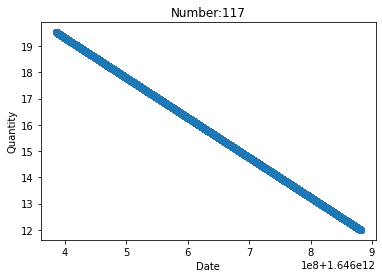

In [2]:
data = pd.read_csv("availability.csv")
x_parameter = []
y_parameter = []
data_number = dict()

for idx, row in data.iterrows():
    if row["number"] not in data_number.keys():
        data_number[row["number"]] = [[row["available_bikes"], row["last_update"]]]
    else:
        data_number[row["number"]].append([row["available_bikes"], row["last_update"]])
keys = list(data_number.keys())
keys.sort()
for key in keys:
    reg = linear_model.LinearRegression()
    quantities = []
    dates = []
    for each in data_number[key]:
        quantities.append(each[0])
        dates.append(each[1])
    q_len = len(quantities)
    quantities = np.reshape(quantities, newshape=(q_len, 1))
    dates = np.reshape(dates, newshape=(q_len, 1))
    reg.fit(dates, quantities)
    k = reg.coef_
    b = reg.intercept_
    A = list(np.arange(1646385527000, 1646881296000, 10000))
    B = []
    for each in A:
        B.append(k * each + b)
    plt.title(f"Number:{key}")
    plt.xlabel("Date")
    plt.ylabel("Quantity")
    plt.scatter(A, B)
    plt.show()

